<a href="https://colab.research.google.com/github/guicorazza/Finance/blob/main/Markowitz_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Markowitz Portfolio Optimization


##1. Importing libraries and data

In [1]:
!pip install yfinance --upgrade --no-cache-dir

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import yfinance as yf
yf.pdr_override()

Downloading 10 years of data for Petrobras and Bovespa. We take the Adjusted Close column as this takes into account dividends, bonuses, splits and merges.

In [4]:
assets = ['PETR4.SA','VALE3.SA']
pf_data = pd.DataFrame()
pf_data = wb.get_data_yahoo(assets, period='10y')['Adj Close']
pf_data.tail()

[*********************100%***********************]  2 of 2 completed


,PETR4.SA,VALE3.SA
Date,,
2023-01-03,22.340000,89.239998
2023-01-04,23.049999,89.400002
2023-01-05,23.879999,90.900002
2023-01-06,23.740000,92.339996
2023-01-09,23.760000,92.650002


##2. Normalizing to 100:

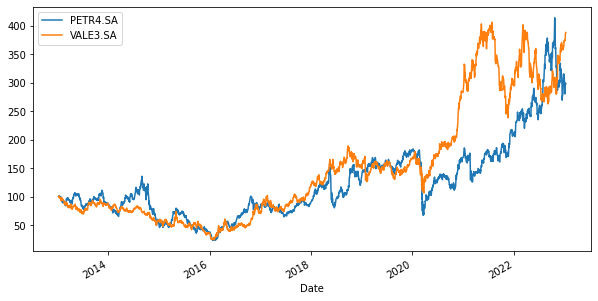

In [5]:
((pf_data / pf_data.iloc[0])*100).plot(figsize = (10,5))

##3. Log returns:

We'll move faster through this section as this is well explained in another notebook: [Investment Risk](https://github.com/guicorazza/Finance/blob/main/Investment_Risk.ipynb)

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns.mean() * 252 #annualized

PETR4.SA    0.110697
VALE3.SA    0.137509
dtype: float64

In [7]:
log_returns.cov() * 252 #covariance

,PETR4.SA,VALE3.SA
PETR4.SA,0.254914,0.101654
VALE3.SA,0.101654,0.197790


In [8]:
log_returns.corr()
#the assets are strongly correlated, as expected

,PETR4.SA,VALE3.SA
PETR4.SA,1.000000,0.452714
VALE3.SA,0.452714,1.000000


In [9]:
num_assets = len(assets) #just a variable to store number of assets so that
#we can reuse in any portfolio

##4. Portfolio weights:

Now, instead of assigning definite weights to each asset, we'll assign random ones.

In [10]:
arr = np.random.random(num_assets) #generating random weights for the assets
arr

array([0.56272377, 0.15751939])

However, because the weights are random, they won't sum to 100%, therefore we need to change the formula.

Instead of += iteration, we'll use /= iteration, which is division.

So `w =/ np.sum(weights)` ⇒ $w = \frac{w_n}{sum(w)}$

⇒ $\frac{w1}{w1+w2} + \frac{w2}{w1+w2} = \frac{w1+w2}{w1+w2} = 1.0$

In [11]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights[0] + weights[1]

1.0

##5. Calculations


###5.1. Expected Portfolio Return


It is given by the sum of weighted annualized average log returns.
This is not the standard sum function we are using though. We use numpy's built-in sum function to work with multi-dimensional sums.

In [12]:
np.sum(weights*log_returns.mean())*252

0.12091432879001111

###5.2. Expected Portfolio Variance


In [13]:
p_var = np.dot(weights.T, np.dot(log_returns.cov()*252, weights))
p_var

0.17432394554408853

###5.3. Expected Portfolio Volatility

In [14]:
p_vol = np.sqrt(p_var)
p_vol

0.4175211917305378

##6. Simulating Markowitz Efficient Frontier

We'll simulate 1000 different combinations of the 2 assets to determine which is more efficient.

In [15]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
  weights_r = np.random.random(num_assets)
  weights_r /= np.sum(weights_r)
  pfolio_returns.append(np.sum(weights_r * log_returns.mean()) * 252)
  pfolio_volatilities.append(np.sqrt(np.dot(weights_r.T,
                                            np.dot(
                                                log_returns.cov()*252,
                                                weights_r))))

In [16]:
portfolios = pd.DataFrame({'Return': pfolio_returns,'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.133173,0.416193
1,0.130709,0.406284
2,0.130792,0.406538
3,0.134890,0.425894
4,0.123705,0.406087


Text(0.5, 1.0, 'Markowitz Efficient Frontier')

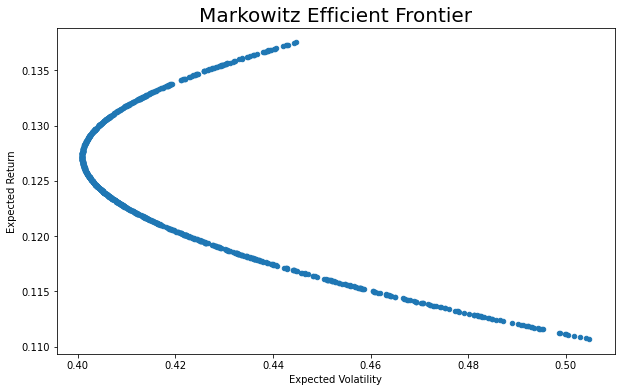

In [17]:
portfolios.plot(x='Volatility', y = 'Return', kind = 'scatter', figsize = (10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Markowitz Efficient Frontier', size=20)